# Curso WRF-python

Gonzalo Zigarán

_gjzigaran@gmail.com_

#### Links:
* https://github.com/NCAR/wrf-python/
* https://github.com/NCAR/wrf_python_tutorial/

## Temas:
1. Introducción a las librerías (python, jupyter notebooks, numpy, pandas, xarray)
1. Cómo leer una salida de WRF 
1. wrf-python
1. Librerías para graficar (matplotlib, basemap)
1. Ejemplos

### 1. Introducción a las librerías

#### Python

- Lenguaje de programación relativamente nuevo y con gran crecimiento
- Es interpretado 
- Licencia de código abierto
- De alto nivel, lo que posibilita que su código sea muy legible.
- Gran cantidad de documentación y comunidad de usuarios



#### Jupyter Notebook

Es una aplicación web de codigo abierto que permite crear documentos que combinan código, visualizaciones y texto, además de ejecutar el código. Originalmente estaba pensado para el intérprete IPython pero ahora también permite trabajar con otros lenguajes como Julia, R, Octave.

#### Numpy

NumPy es un paquete para computación científica con Python. Le agrega un mayor soporte para el trabajo con vectores y matrices eficientemente, integrado con C y Fortran.

Los arreglos de numpy pueden ser creados con los tipos comunes de C:
- int8, int16, int32, int64 
- float16, float32, float64 [default]
- bool
- complex64, complex128
y pueden ser ordenados como en C (más rápido de acceder a derecha, por defecto) o como en Fortran (más rápido de acceder a izquierda)

##### Ejemplo de uso:

In [1]:
import numpy as np

# crea un un arreglo tri-dimensional de ceros
my_array = np.zeros((3,3,3), "float32")

# acceder a un elemento
first_element = my_array[0,0,0]

# editar un elemento
my_array[0,0,1] = 5

# acceder a una fila
first_row = my_array[0,0,:]

print my_array
print first_element
print first_row

[[[ 0.  5.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]
0.0
[ 0.  5.  0.]



#### Pandas

Pandas es una librería que proporciona alto rendimiento para el análisis y estructura de datos. Es fácil e intuitivo de usar y conbina muchas funciones con NumPy. (Gran reemplazo del excel)

##### Ejemplo de uso:


In [2]:
import pandas as pd

d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])} 

df = pd.DataFrame(d)


df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [3]:
df2 = pd.DataFrame(columns=['one','two'])

df2.loc['a'] = [1,1]
df2.loc['b'] = [2,2]
df2.loc['c'] = [3,3]
df2.loc['d', 'two'] = 4

df2

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [4]:
df2['two']

a    1
b    2
c    3
d    4
Name: two, dtype: object


#### xarray

Librería que buscar profundizar Pandas para poder trabajar con estructuras de datos más complejas. En particular trabaja con estructuras similares al formato NetCDF. Basicamente busca complejizar la estructura de arreglos de Numpy con metadatos.

##### Ejemplo de uso:


In [5]:
import numpy as np
import xarray

my_array = np.zeros((3,3,3), "float32")

# Nobre de dimensiones y coordenadas

my_name = "my_xarray"

my_dims = ["bottom_top", "south_north", "west_east"]

my_coords = {"bottom_top" : [100., 200., 300.],
          "south_north": [40., 50., 60.],
          "west_east" : [-120., -110., -100.]
         }

my_attrs = {"info" : "This is my xarray"}

my_xarray = xarray.DataArray(my_array,
                           name=my_name,
                           dims=my_dims, 
                           coords=my_coords, 
                           attrs=my_attrs)

print (my_xarray)

<xarray.DataArray 'my_xarray' (bottom_top: 3, south_north: 3, west_east: 3)>
array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]], dtype=float32)
Coordinates:
  * south_north  (south_north) float64 40.0 50.0 60.0
  * west_east    (west_east) float64 -120.0 -110.0 -100.0
  * bottom_top   (bottom_top) float64 100.0 200.0 300.0
Attributes:
    info:     This is my xarray


### 2. Cómo leer una salida de WRF 

El archivo que devuelve el WRF tiene el formato NetCDF y contiene toda la información relativa a la simulación. Basicamente se destacan 3 secciones a tener en cuenta: 

- La primera son datos globales propios del archivo, como puede ser la fecha de inicio, la versión utilizada de WRF, la resolución, la proyección usada, etc.

- La segunda son las dimensiones, tanto de la grilla, de la resolución vertical, y del tiempo

- Y la tercera son las variables.

Hay varias alternativas de programas para analizar un NetCDF (como por ejemplo ncdump, ncl_filedump, netcdf4-python, PyNIO, xarray, etc), algunos en Python y otros directamente por terminal.



#### netcdf4-python

Vamos a utilizar **netcdf4-python**, para poder verlo directamente desde la consola de Python. 


##### Datos globales

Una vez cargada la salida del WRF, se pueden listar todos los datos globales con * .\__dict\__ * , o también accediendo a cada variable particularmente con * .NOMBRE_VARIABLE *

In [6]:
from netCDF4 import Dataset

nc_file = Dataset("wrfout_d01_2017-10-26_00:00:00")

nc_file.START_DATE

u'2017-10-26_00:00:00'

In [7]:
nc_file.__dict__

OrderedDict([(u'TITLE', u' OUTPUT FROM WRF V3.8 MODEL'),
             (u'START_DATE', u'2017-10-26_00:00:00'),
             (u'SIMULATION_START_DATE', u'2017-10-26_00:00:00'),
             (u'WEST-EAST_GRID_DIMENSION', 100),
             (u'SOUTH-NORTH_GRID_DIMENSION', 170),
             (u'BOTTOM-TOP_GRID_DIMENSION', 35),
             (u'DX', 30000.0),
             (u'DY', 30000.0),
             (u'SKEBS_ON', 0),
             (u'SPEC_BDY_FINAL_MU', 1),
             (u'USE_Q_DIABATIC', 0),
             (u'GRIDTYPE', u'C'),
             (u'DIFF_OPT', 1),
             (u'KM_OPT', 4),
             (u'DAMP_OPT', 0),
             (u'DAMPCOEF', 0.2),
             (u'KHDIF', 0.0),
             (u'KVDIF', 0.0),
             (u'MP_PHYSICS', 4),
             (u'RA_LW_PHYSICS', 1),
             (u'RA_SW_PHYSICS', 1),
             (u'SF_SFCLAY_PHYSICS', 1),
             (u'SF_SURFACE_PHYSICS', 2),
             (u'BL_PBL_PHYSICS', 1),
             (u'CU_PHYSICS', 5),
             (u'SF_LAKE_PHYSICS

##### Dimensiones

La grilla que utiliza WRF se compone de la siguiente manera:

![..](wrf_stagger.png)

- Las variables se conputan en los * mass points * que se ubican en el centro de la celda
- La componente u del viento se calcula en el limite derecho e izquierdo de la celda. En esta dirección se guarda un punto más.
- La componente v del viento se calcula en el limite superior e inferior de la celda. En esta dirección se guarda un punto más.
- Las esquinas de la celda son los * staggered points * , tiene un punto más en cada dirección. 


[link a wrf grid structure del sitio de mmm](http://www2.mmm.ucar.edu/rt/amps/information/configuration/wrf_grid_structure.html)

In [8]:
nc_file.dimensions

OrderedDict([(u'Time',
              <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 25),
             (u'DateStrLen',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'DateStrLen', size = 19),
             (u'west_east',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'west_east', size = 99),
             (u'south_north',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'south_north', size = 169),
             (u'bottom_top',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top', size = 34),
             (u'bottom_top_stag',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top_stag', size = 35),
             (u'soil_layers_stag',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'soil_layers_stag', size = 4),
             (u'west_east_stag',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'west_east_stag', size = 100),
             (u'south_north_stag',
              <type 'netCDF4._

##### Variables

Esta estructura es la más compleja. Se pueden listar todas las variables y para cada una se almacena la siguiente estructura:

- atributos (datos generales de la variable, como unidad, coordenadas, descripción, etc)
- dimensiones (toma alguna de las dimensiones vistas antes)
- valores (los valores que toma para cada dimension)


In [9]:
# Para listar todos los nombres de variables posibles
nc_file.variables.keys()

[u'Times',
 u'XLAT',
 u'XLONG',
 u'LU_INDEX',
 u'ZNU',
 u'ZNW',
 u'ZS',
 u'DZS',
 u'VAR_SSO',
 u'U',
 u'V',
 u'W',
 u'PH',
 u'PHB',
 u'T',
 u'HFX_FORCE',
 u'LH_FORCE',
 u'TSK_FORCE',
 u'HFX_FORCE_TEND',
 u'LH_FORCE_TEND',
 u'TSK_FORCE_TEND',
 u'MU',
 u'MUB',
 u'NEST_POS',
 u'P',
 u'PB',
 u'FNM',
 u'FNP',
 u'RDNW',
 u'RDN',
 u'DNW',
 u'DN',
 u'CFN',
 u'CFN1',
 u'THIS_IS_AN_IDEAL_RUN',
 u'P_HYD',
 u'Q2',
 u'T2',
 u'TH2',
 u'PSFC',
 u'U10',
 u'V10',
 u'RDX',
 u'RDY',
 u'RESM',
 u'ZETATOP',
 u'CF1',
 u'CF2',
 u'CF3',
 u'ITIMESTEP',
 u'XTIME',
 u'QVAPOR',
 u'QCLOUD',
 u'QRAIN',
 u'QICE',
 u'QSNOW',
 u'SHDMAX',
 u'SHDMIN',
 u'SNOALB',
 u'TSLB',
 u'SMOIS',
 u'SH2O',
 u'SMCREL',
 u'SEAICE',
 u'XICEM',
 u'SFROFF',
 u'UDROFF',
 u'IVGTYP',
 u'ISLTYP',
 u'VEGFRA',
 u'GRDFLX',
 u'ACGRDFLX',
 u'ACSNOM',
 u'SNOW',
 u'SNOWH',
 u'CANWAT',
 u'SSTSK',
 u'COSZEN',
 u'LAI',
 u'DTAUX3D',
 u'DTAUY3D',
 u'DUSFCG',
 u'DVSFCG',
 u'VAR',
 u'CON',
 u'OA1',
 u'OA2',
 u'OA3',
 u'OA4',
 u'OL1',
 u'OL2',
 u'OL3',
 u'

In [47]:
# Para listar los atributos de una variable
nc_file.variables['T'].__dict__

OrderedDict([(u'FieldType', 104),
             (u'MemoryOrder', u'XYZ'),
             (u'description',
              u'perturbation potential temperature (theta-t0)'),
             (u'units', u'K'),
             (u'stagger', u''),
             (u'coordinates', u'XLONG XLAT XTIME')])

In [11]:
# Para listar las dimensiones de una variable
nc_file.variables['T'].dimensions

(u'Time', u'bottom_top', u'south_north', u'west_east')

In [12]:
# Para ver el arreglo con los valores
nc_file.variables['T2'][:]

array([[[ 277.00924683,  277.08822632,  277.03015137, ...,  272.36404419,
          272.39993286,  272.48239136],
        [ 277.13763428,  277.19869995,  277.15005493, ...,  272.50149536,
          272.51889038,  272.57196045],
        [ 277.28149414,  277.3343811 ,  277.32974243, ...,  272.5993042 ,
          272.64575195,  272.74957275],
        ..., 
        [ 289.23294067,  289.30737305,  289.34954834, ...,  302.21768188,
          303.20321655,  303.7890625 ],
        [ 289.36206055,  289.27319336,  288.97393799, ...,  302.25457764,
          304.13796997,  305.05462646],
        [ 289.2762146 ,  288.85748291,  288.65142822, ...,  302.10943604,
          303.84197998,  304.87857056]],

       [[ 276.92785645,  277.03341675,  276.98690796, ...,  272.20181274,
          272.21914673,  272.29986572],
        [ 277.10531616,  277.20437622,  277.15264893, ...,  272.2911377 ,
          272.32626343,  272.47821045],
        [ 277.29199219,  277.33847046,  277.35375977, ...,  272.27941895

Por ejemplo para las componentes del viento, que toma valores en los bordes de las grillas, podemos ver que toma otras dimensiones

In [13]:
# Para listar los atributos de una variable
nc_file.variables['U'].__dict__

OrderedDict([(u'FieldType', 104),
             (u'MemoryOrder', u'XYZ'),
             (u'description', u'x-wind component'),
             (u'units', u'm s-1'),
             (u'stagger', u'X'),
             (u'coordinates', u'XLONG_U XLAT_U XTIME')])

In [14]:
# Para listar las dimensiones de una variable
nc_file.variables['U'].dimensions

(u'Time', u'bottom_top', u'south_north', u'west_east_stag')

### 3. wrf-python

**wrf-python** es un paquete desarrollado en Python por la NCAR (National Center for Atmospheric Research) que tiene una colección de cálculos diagnosticos y rutinas para interpolar (a niveles horizontales, * cross section *, a nivel de * superficie * ). Además provee funciones auxiliares para facilitar los gráficos con **cartopy** , ** basemap ** y ** PyNGL **

A pesar de que toda la interfaz esté en Python, utiliza rutinas definidas en Fortran para trabajar más eficientemente.

Algunas funciones útiles:
- getvar: extrae una variable o genera una variable diagnóstico nueva.
- interplevel: interpolación lineal de una variable a un plano horizontal de un nivel vertival específico.
- vertcross: interpola una variable en 3D a una sección transversal
- vinterp: Interpola una variable a una nueva superficie
- ll_to_xy, xy_to_ll : funciones para convertir un punto de latitud/longitud a (x,y) de la grilla

#### 3.1 getvar

Esta función se puede usar para extraer variables que ya estan en el NetCDF o generar variables nuevas. También se puede concatenar una variable a través de varios archivos NetCDF.

Por defecto extrae la variable para el tiempo 0, en caso de querer la variable para todos los tiempos del archivo hay que agregar timeidx=wrf.ALL_TIMES

En caso de tener la librería xarray cargada, la función devuelve la variable cargada con el tipo de DataArray de xarray.

Para ver la tabla de todas las posibles variables diagnositcos que se pueden generar: [link](http://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.getvar.html)

*Ejemplo:*


In [15]:
import wrf 

# Extrae la temperatura a 2 metros del nivel del suelo
t2 = wrf.getvar(nc_file, "T2", timeidx=wrf.ALL_TIMES)

t2

<xarray.DataArray 'T2' (Time: 25, south_north: 169, west_east: 99)>
array([[[ 277.009247,  277.088226, ...,  272.399933,  272.482391],
        [ 277.137634,  277.1987  , ...,  272.51889 ,  272.57196 ],
        ..., 
        [ 289.362061,  289.273193, ...,  304.13797 ,  305.054626],
        [ 289.276215,  288.857483, ...,  303.84198 ,  304.878571]],

       [[ 276.927856,  277.033417, ...,  272.219147,  272.299866],
        [ 277.105316,  277.204376, ...,  272.326263,  272.47821 ],
        ..., 
        [ 289.320709,  289.21933 , ...,  301.580933,  302.415161],
        [ 289.217346,  288.864288, ...,  301.71637 ,  302.533539]],

       ..., 
       [[ 275.177338,  275.342133, ...,  272.118835,  272.10495 ],
        [ 275.375   ,  275.454285, ...,  272.253113,  272.37439 ],
        ..., 
        [ 289.588287,  289.512878, ...,  304.437317,  304.654999],
        [ 289.528625,  289.05188 , ...,  304.645142,  305.111206]],

       [[ 275.131805,  275.261536, ...,  272.100677,  272.10083 ],


In [50]:
# Altura en km, al desactivar la opción msl (Median Sea Level) se calcula AGL (Above Ground Level)
z = wrf.getvar(nc_file, 'z', timeidx=wrf.ALL_TIMES, msl=False, units='km')

# Reflectividad simulada
temp = wrf.getvar(nc_file, 'temp', timeidx=wrf.ALL_TIMES, units='degC')

temp

<xarray.DataArray u'temp' (Time: 25, bottom_top: 34, south_north: 169, west_east: 99)>
array([[[[  3.687805, ...,  -0.688599],
         ..., 
         [ 15.823792, ...,  31.738434]],

        ..., 
        [[-54.465256, ..., -73.464691],
         ..., 
         [-67.10672 , ..., -67.872711]]],


       ..., 
       [[[  1.543243, ...,  -0.637573],
         ..., 
         [ 16.032043, ...,  31.939972]],

        ..., 
        [[-52.848572, ..., -73.159805],
         ..., 
         [-67.334   , ..., -66.476334]]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -90.1131 -89.608 -89.1008 ...
    XLAT     (south_north, west_east) float32 -59.5115 -59.599 -59.6847 ...
    XTIME    (Time) float32 0.0 60.0 120.0 180.0 240.0 300.0 360.0 420.0 ...
  * Time     (Time) datetime64[ns] 2017-10-26 2017-10-26T01:00:00 ...
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  temperature
 

#### 3.2 interplevel

Esta función interpola de manera simple y rápida a una altura o nivel de presión específico. Usa  la interpolación lineal, para interpolar con más opciones se puede usar la función ** vinterp **

*Ejemplo:*

In [51]:
# Interpolación de la reflectividad a 10 km sobre la superficie
dbz_10 = wrf.interplevel(dbz,z,10)

dbz_10

<xarray.DataArray u'temp_10_km' (Time: 25, south_north: 169, west_east: 99)>
array([[[-55.038158, -55.444103, ..., -65.221306, -65.245781],
        [-54.933277, -55.393635, ..., -65.22551 , -65.266136],
        ..., 
        [-35.15493 , -35.2057  , ..., -36.503113, -36.515377],
        [-35.080395, -35.131531, ..., -36.290215, -36.372608]],

       [[-54.575459, -54.98531 , ..., -65.278419, -65.270645],
        [-54.487331, -54.886112, ..., -65.372292, -65.241173],
        ..., 
        [-35.091316, -35.119965, ..., -36.633789, -36.579304],
        [-35.022064, -35.054691, ..., -36.350567, -36.422977]],

       ..., 
       [[-47.371788, -47.546852, ..., -67.385475, -67.119682],
        [-47.133289, -47.322968, ..., -67.195137, -66.93277 ],
        ..., 
        [-34.55283 , -34.577953, ..., -37.939671, -37.937889],
        [-34.454659, -34.463684, ..., -37.655697, -37.758022]],

       [[-47.337444, -47.524189, ..., -67.480545, -67.229797],
        [-47.056847, -47.254471, ..., -67.2

#### 3.3 ll_to_xy, xy_to_ll

Esta función sirve para encontrar el par (x,y) de la grilla mas cercano a partir de una latitud y longitud (y viceversa).

Una vez teniendo el par (x,y) se pueden obtener los datos de las variables para ese lugar.

*Ejemplo:*

In [52]:
# Obtenemos los puntos de la grilla para CONAE
lat = -31.524
lon = -64.463

(x, y) = wrf.ll_to_xy(nc_file, lat, lon)

(x, y)

(<xarray.DataArray u'xy' ()>
 array(46)
 Coordinates:
     latlon_coord  object CoordPair(lat=-31.524, lon=-64.463)
     x_y           <U1 u'x', <xarray.DataArray u'xy' ()>
 array(109)
 Coordinates:
     latlon_coord  object CoordPair(lat=-31.524, lon=-64.463)
     x_y           <U1 u'y')

In [53]:
# Vemos cual es la latitud y longitud exactas que representa ese par (x, y)
wrf.xy_to_ll(nc_file, x, y)

<xarray.DataArray u'latlon' (lat_lon: 2)>
array([-31.626016, -64.457134])
Coordinates:
  * lat_lon   (lat_lon) <U3 u'lat' u'lon'
    xy_coord  object CoordPair(x=46, y=109)

In [54]:
# El 'x' es el valor en la coordenada de oeste a este, y el 'y' el valor de la coordenada sur a norte

t2_conae = t2[:, y, x]

t2_conae

<xarray.DataArray 'T2' (Time: 25)>
array([ 291.758972,  289.751617,  289.434021,  289.256409,  289.197388,
        290.335663,  290.148285,  288.770142,  288.397552,  288.307648,
        288.26358 ,  290.179474,  291.391846,  293.708984,  294.565308,
        294.934998,  296.092499,  296.751617,  297.311066,  295.188629,
        293.687622,  292.103333,  290.11264 ,  290.751801,  290.840485], dtype=float32)
Coordinates:
    XLONG         float32 -64.4572
    XLAT          float32 -31.626
    XTIME         (Time) float32 0.0 60.0 120.0 180.0 240.0 300.0 360.0 ...
  * Time          (Time) datetime64[ns] 2017-10-26 2017-10-26T01:00:00 ...
    latlon_coord  object CoordPair(lat=-31.524, lon=-64.463)
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-63.5, moad_cen_lat=-38.50000762...

In [55]:
t2_conae.to_pandas()

Time
2017-10-26 00:00:00    291.758972
2017-10-26 01:00:00    289.751617
2017-10-26 02:00:00    289.434021
2017-10-26 03:00:00    289.256409
2017-10-26 04:00:00    289.197388
2017-10-26 05:00:00    290.335663
2017-10-26 06:00:00    290.148285
2017-10-26 07:00:00    288.770142
2017-10-26 08:00:00    288.397552
2017-10-26 09:00:00    288.307648
2017-10-26 10:00:00    288.263580
2017-10-26 11:00:00    290.179474
2017-10-26 12:00:00    291.391846
2017-10-26 13:00:00    293.708984
2017-10-26 14:00:00    294.565308
2017-10-26 15:00:00    294.934998
2017-10-26 16:00:00    296.092499
2017-10-26 17:00:00    296.751617
2017-10-26 18:00:00    297.311066
2017-10-26 19:00:00    295.188629
2017-10-26 20:00:00    293.687622
2017-10-26 21:00:00    292.103333
2017-10-26 22:00:00    290.112640
2017-10-26 23:00:00    290.751801
2017-10-27 00:00:00    290.840485
dtype: float32

In [56]:
df = pd.DataFrame(t2_conae.to_pandas(), columns=['T2'])

df

,T2
Time,
2017-10-26 00:00:00,291.758972
2017-10-26 01:00:00,289.751617
2017-10-26 02:00:00,289.434021
2017-10-26 03:00:00,289.256409
2017-10-26 04:00:00,289.197388
2017-10-26 05:00:00,290.335663
2017-10-26 06:00:00,290.148285
2017-10-26 07:00:00,288.770142
2017-10-26 08:00:00,288.397552


In [57]:
# Agregar columna con la temperatura en grados celsius
df['T2_degC'] = df['T2'] - 273.15

df

,T2,T2_degC
Time,,
2017-10-26 00:00:00,291.758972,18.608978
2017-10-26 01:00:00,289.751617,16.601624
2017-10-26 02:00:00,289.434021,16.284027
2017-10-26 03:00:00,289.256409,16.106415
2017-10-26 04:00:00,289.197388,16.047394
2017-10-26 05:00:00,290.335663,17.185669
2017-10-26 06:00:00,290.148285,16.998291
2017-10-26 07:00:00,288.770142,15.620148
2017-10-26 08:00:00,288.397552,15.247559


In [58]:
# Temperatura máxima del período de simulación
print "Máxima", df['T2_degC'].max()

# Temperatura mínima del período de simulación
print "Mínima", df['T2_degC'].min()

# Temperatura media del período de simulación
print "Media", df['T2_degC'].mean()

Máxima 24.1611
Mínima 15.1136
Media 18.4996700287


### 4.  Librerías para graficar


#### Matplotlib

Es la principal librería para trabajar con gráficos en Python. 

Galeria con ejemplos:

http://matplotlib.org/gallery

La librería * pandas * trae una integración con matplotlib para graficar rápidamente 

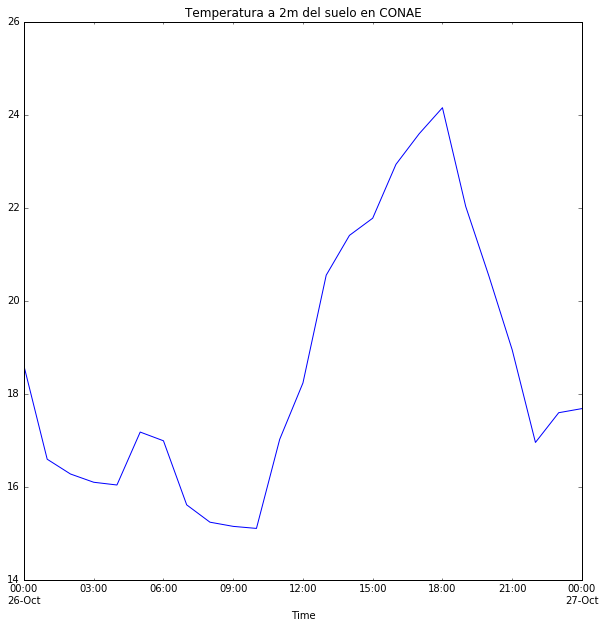

In [59]:
%matplotlib inline 

from matplotlib import pyplot as plt

# Creamos la figura
plt.figure(figsize=(10,10))

df['T2_degC'].plot()

plt.title('Temperatura a 2m del suelo en CONAE')

plt.show()

#### Basemap

Basemap es una librería para graficar información en 2D sobre mapas. Tiene varias proyecciones de mapas e información vectorial cargada (como limites políticos, cuerpos de agua, límites continentales, etc.)

**wrf-python** trae varias funciones auxiliares para facilitar la carga de datos a basemap. Por ejemplo con **get_basemap** cargamos el mapa del dominio, con **latlon_coords** cargamos las variables latitud y longitud.


### 5.  Ejemplos

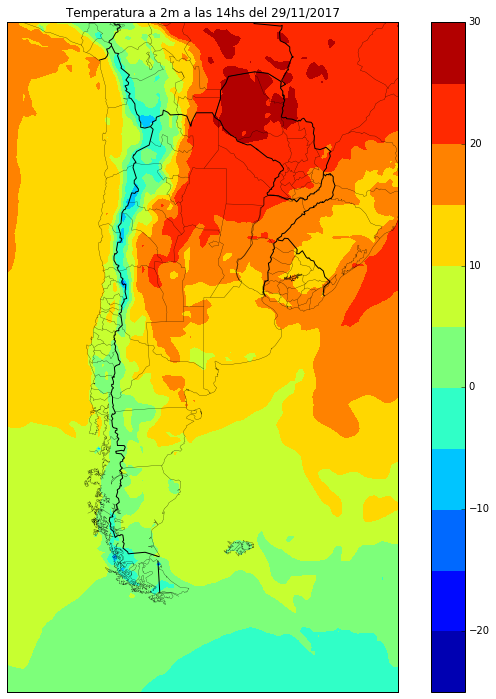

In [60]:
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import get_cmap

t2_degC = t2.copy()
t2_degC.values = t2.values - 273.15

# Nos quedamos con las latitudes y longitudes
lats, lons = wrf.latlon_coords(t2_degC)

# Creamos el basemap
bm = wrf.get_basemap(t2_degC)

# Creamos la figura
plt.figure(figsize=(12,12))

# Se agregan los vectores de datos geográficos
bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=1)

# Definimos la grilla x, y para graficar 
x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

# Se grafica la variable
bm.contourf(x, y, t2_degC[8], 10, cmap=get_cmap("jet"))

# Se agrega la escala de colores
plt.colorbar()

plt.title("Temperatura a 2m a las 14hs del 29/11/2017")

plt.show()

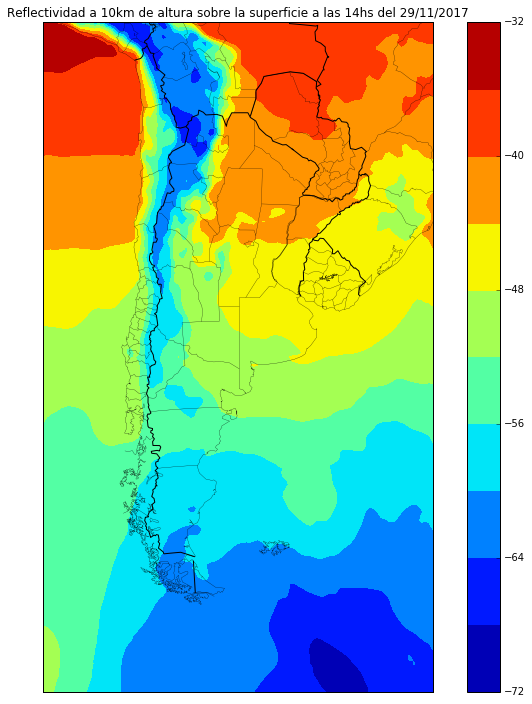

In [61]:
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import get_cmap

# Creamos la figura
plt.figure(figsize=(12,12))

# Se agregan los vectores de datos geográficos
bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=1)

# Se grafica la variable
bm.contourf(x, y, dbz_10[8], 10, cmap=get_cmap("jet"))

# Se agrega la escala de colores
plt.colorbar()

plt.title("Reflectividad a 10km de altura sobre la superficie a las 14hs del 29/11/2017")

plt.show()

Para ver más ejemplos en la documentación de wrf-python:
http://wrf-python.readthedocs.io/en/latest/plot.html